# Plotting Example


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

## Compute the Fast Fourier Transform (FFT)


In [2]:

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs


## Use the PSD to filter out noise

In [3]:
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

## Plots

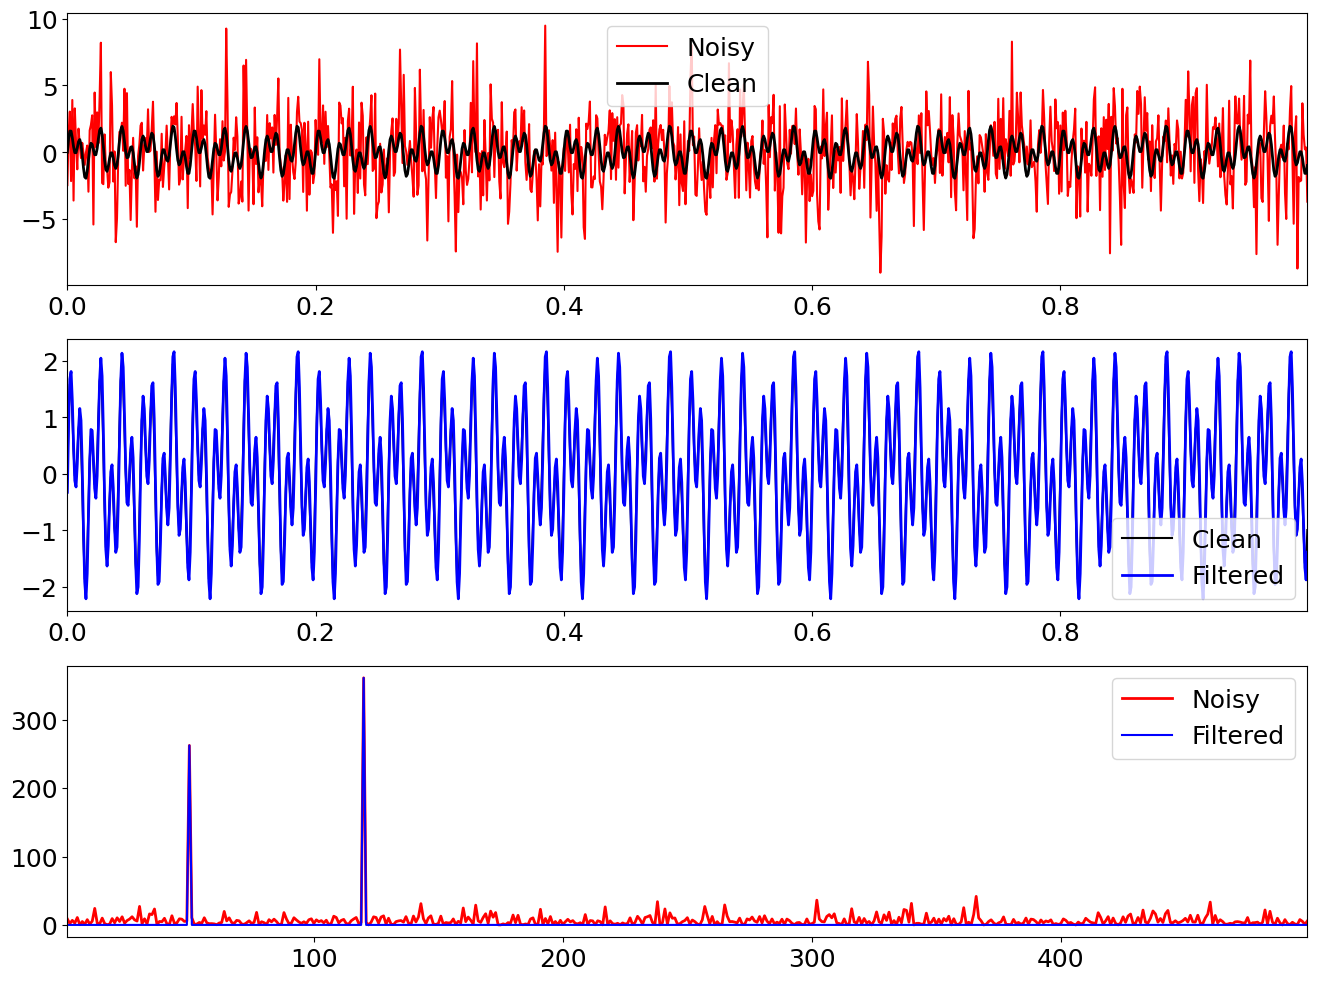

In [4]:
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, np.real(f_clean),color='k',linewidth=1.5,label='Clean')
plt.plot(t, np.real(ffilt),color='b',linewidth=2,label='Filtered')
plt.xlim(t[0], np.real(t[-1]))
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], np.real(PSD[L]),color='r',linewidth=2,label='Noisy')
plt.plot(freq[L], np.real(PSDclean[L]),color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]], np.real(freq[L[-1]]))
plt.legend()

plt.show()